In [156]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import PIL.Image
from albumentations import Compose, ShiftScaleRotate, Cutout, IAAAdditiveGaussianNoise, OpticalDistortion, GridDistortion, ElasticTransform

In [2]:
images = np.load("../input/train_128x128_crop.npy")
val = pd.read_csv("../val_index.csv")
preds = np.load("../result/baseline_2020_02_20_14_35_56/val_preds_0.npy")

In [6]:
val[["pred_gr", "pred_vd", "pred_cd"]] = pd.DataFrame(preds)

In [8]:
val["ind"] = val.image_id.apply(lambda x: int(x.split("_")[1]))

In [198]:
def crop_char_image(image, threshold=25):
    assert image.ndim == 2
    is_black = image < threshold

    is_black_vertical = np.sum(is_black, axis=0) > 0
    is_black_horizontal = np.sum(is_black, axis=1) > 0
    left = np.argmax(is_black_horizontal)
    right = np.argmax(is_black_horizontal[::-1])
    top = np.argmax(is_black_vertical)
    bottom = np.argmax(is_black_vertical[::-1])
    print(left, right, top, bottom)
    height, width = image.shape
    cropped_image = image[left-20:height - right+20, top-20:width - bottom+20]
    return cropped_image

In [160]:
aug = Compose([
    ShiftScaleRotate(rotate_limit=15, p=1),
#     IAAAdditiveGaussianNoise(p=1),
    OpticalDistortion(p=1),
    GridDistortion(p=1),
#     ElasticTransform(p=1),
#     Cutout(max_h_size=16, max_w_size=16, p=1)
])

In [17]:
val

,Unnamed: 0,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme,pred_gr,pred_vd,pred_cd,ind
0,0,Train_8,67,0,0,ত্থ,67,0,0,8
1,1,Train_29,160,0,0,হ্ন,160,0,0,29
2,2,Train_32,103,1,5,ফ্রা,103,1,5,32
3,3,Train_41,23,4,0,গু,23,4,0,41
4,4,Train_52,43,1,4,জ্যা,43,1,4,52
...,...,...,...,...,...,...,...,...,...,...
40163,40163,Train_200829,81,4,0,নু,81,4,0,200829
40164,40164,Train_200830,39,2,0,চ্চি,39,2,0,200830
40165,40165,Train_200831,81,9,2,র্নো,81,9,2,200831
40166,40166,Train_200836,65,9,0,ত্তো,65,9,0,200836


In [54]:
miss_gr = val[val.grapheme_root != val.pred_gr]

124 Unnamed: 0                   10616
image_id               Train_52948
grapheme_root                   71
vowel_diacritic                  1
consonant_diacritic              0
grapheme                        থা
pred_gr                         22
pred_vd                          1
pred_cd                          0
ind                          52948
Name: 10616, dtype: object


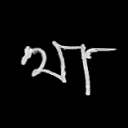

In [180]:
r = random.randint(0, len(miss_gr)-1)
print(r, miss_gr.iloc[r])
PIL.Image.fromarray(images[miss_gr.iloc[r].ind])

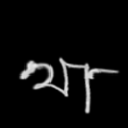

In [188]:
PIL.Image.fromarray(aug(image=images[miss_gr.iloc[r].ind])["image"])